In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib qt
#%matplotlib inline

In [3]:
summer_data = pd.read_csv(r'BHAM_IIT_summer_ozone_final_edited.csv')
print(summer_data)

             date (IST)  O3 (ppb)
0      26/04/2018 16:24   104.904
1      26/04/2018 16:25   102.303
2      26/04/2018 16:26   103.608
3      26/04/2018 16:27   106.620
4      26/04/2018 16:28   103.694
...                 ...       ...
57572  05/06/2018 15:56    50.476
57573  05/06/2018 15:57    50.137
57574  05/06/2018 15:58    52.498
57575  05/06/2018 15:59    53.510
57576  05/06/2018 16:00    53.035

[57577 rows x 2 columns]


In [4]:
summer_data.head()

,date (IST),O3 (ppb)
0,26/04/2018 16:24,104.904
1,26/04/2018 16:25,102.303
2,26/04/2018 16:26,103.608
3,26/04/2018 16:27,106.620
4,26/04/2018 16:28,103.694


In [5]:
summer_data.dtypes
#date as object. A string, characters that are in quotes.
#float 64. This data type accepts data that are a wide variety of numeric formats including decimals (floating point values) and integers. Numeric also accept larger numbers than int will.

date (IST)     object
O3 (ppb)      float64
dtype: object

In [6]:
type(summer_data['date (IST)'][0])
#data type in the date column

str

In [7]:
summer_data_date = pd.read_csv(r'BHAM_IIT_summer_ozone_final_edited.csv', parse_dates=['date (IST)'], infer_datetime_format=True, index_col=['date (IST)'])

In [8]:
summer_data_date

,O3 (ppb)
date (IST),
2018-04-26 16:24:00,104.904
2018-04-26 16:25:00,102.303
2018-04-26 16:26:00,103.608
2018-04-26 16:27:00,106.620
2018-04-26 16:28:00,103.694
...,...
2018-06-05 15:56:00,50.476
2018-06-05 15:57:00,50.137
2018-06-05 15:58:00,52.498


In [9]:
summer_data_date.index

DatetimeIndex(['2018-04-26 16:24:00', '2018-04-26 16:25:00',
               '2018-04-26 16:26:00', '2018-04-26 16:27:00',
               '2018-04-26 16:28:00', '2018-04-26 16:29:00',
               '2018-04-26 16:30:00', '2018-04-26 16:31:00',
               '2018-04-26 16:32:00', '2018-04-26 16:33:00',
               ...
               '2018-06-05 15:51:00', '2018-06-05 15:52:00',
               '2018-06-05 15:53:00', '2018-06-05 15:54:00',
               '2018-06-05 15:55:00', '2018-06-05 15:56:00',
               '2018-06-05 15:57:00', '2018-06-05 15:58:00',
               '2018-06-05 15:59:00', '2018-06-05 16:00:00'],
              dtype='datetime64[ns]', name='date (IST)', length=57577, freq=None)

In [10]:
summer_data_date.head()

,O3 (ppb)
date (IST),
2018-04-26 16:24:00,104.904
2018-04-26 16:25:00,102.303
2018-04-26 16:26:00,103.608
2018-04-26 16:27:00,106.620
2018-04-26 16:28:00,103.694


In [11]:
summer_data_date.index.values

array(['2018-04-26T16:24:00.000000000', '2018-04-26T16:25:00.000000000',
       '2018-04-26T16:26:00.000000000', ...,
       '2018-06-05T15:58:00.000000000', '2018-06-05T15:59:00.000000000',
       '2018-06-05T16:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
test = summer_data.set_index('date (IST)')
test.index = pd.to_datetime(test.index)

In [13]:
test.index

DatetimeIndex(['2018-04-26 16:24:00', '2018-04-26 16:25:00',
               '2018-04-26 16:26:00', '2018-04-26 16:27:00',
               '2018-04-26 16:28:00', '2018-04-26 16:29:00',
               '2018-04-26 16:30:00', '2018-04-26 16:31:00',
               '2018-04-26 16:32:00', '2018-04-26 16:33:00',
               ...
               '2018-05-06 15:51:00', '2018-05-06 15:52:00',
               '2018-05-06 15:53:00', '2018-05-06 15:54:00',
               '2018-05-06 15:55:00', '2018-05-06 15:56:00',
               '2018-05-06 15:57:00', '2018-05-06 15:58:00',
               '2018-05-06 15:59:00', '2018-05-06 16:00:00'],
              dtype='datetime64[ns]', name='date (IST)', length=57577, freq=None)

In [24]:
df_ozone = pd.DataFrame(summer_data, columns = ['O3 (ppb)'])


In [25]:
print (df_ozone)

       O3 (ppb)
0       104.904
1       102.303
2       103.608
3       106.620
4       103.694
...         ...
57572    50.476
57573    50.137
57574    52.498
57575    53.510
57576    53.035

[57577 rows x 1 columns]


/home/lp555/.conda/envs/test/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


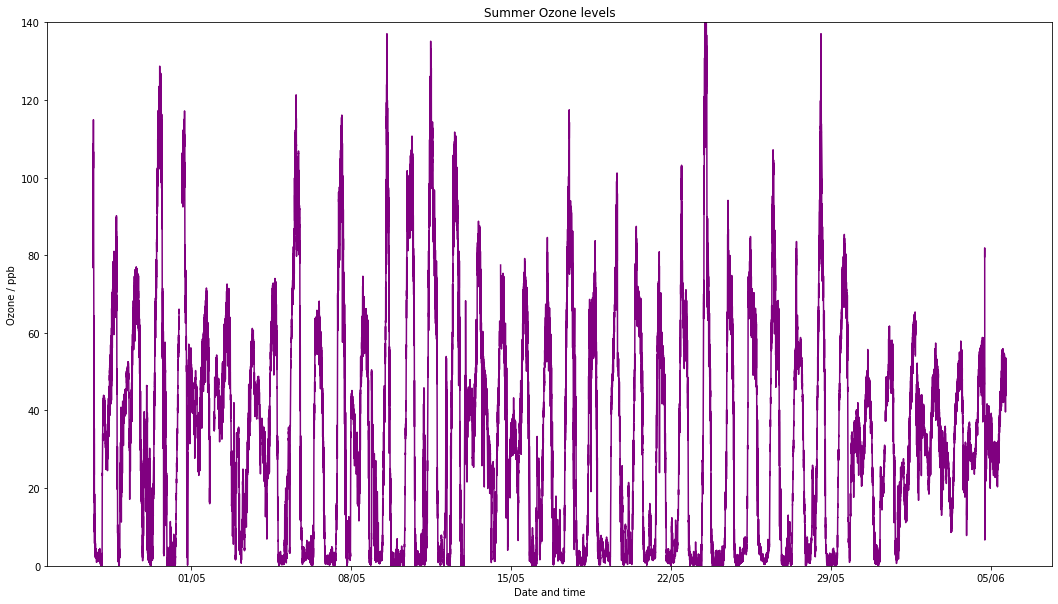

In [26]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(18, 10))

# Add the x-axis and the y-axis to the plot
ax.plot(summer_data_date.index.values[:],
        df_ozone[:], '-',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Summer Ozone levels")

# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

axes = plt.gca()
axes.set_ylim([0,140])

plt.show()

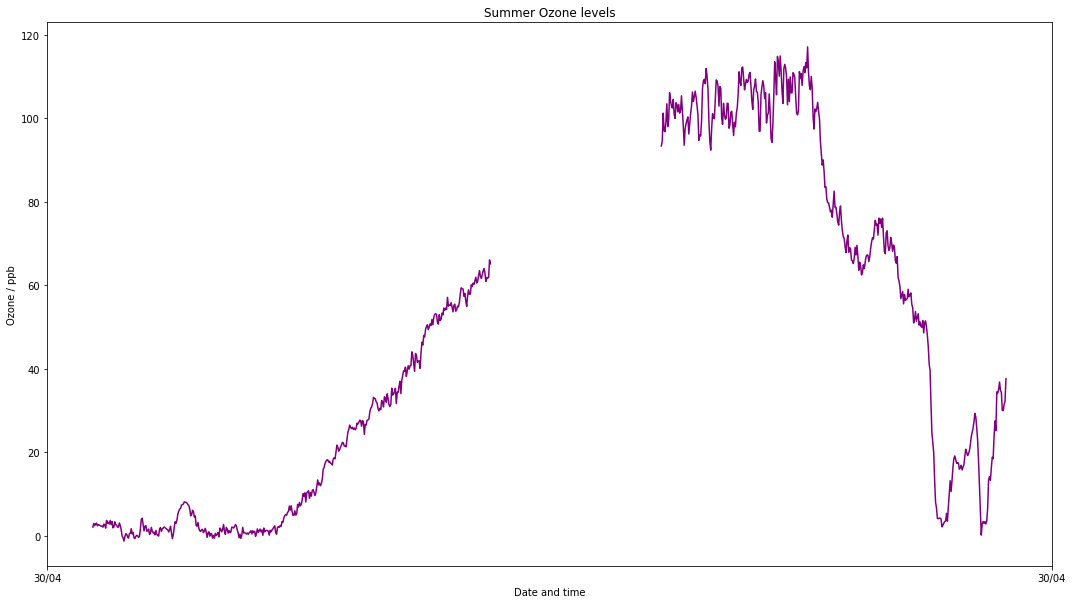

In [30]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(summer_data_date.index.values[5000:6000],
        df_ozone[5000:6000], '-',
        color='purple')

ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Summer Ozone levels")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

plt.show()

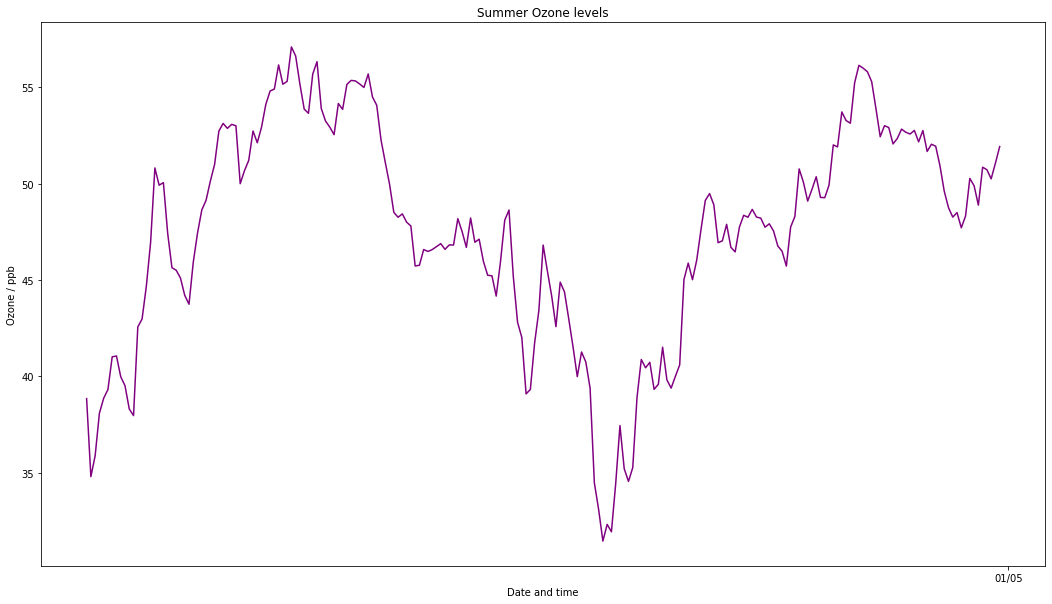

In [39]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(summer_data_date.index.values[6000:6215],
        df_ozone[6000:6215], '-',
        color='purple')

ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Summer Ozone levels")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

plt.show()

In [43]:
df_ozone[6215:6240]

,O3 (ppb)
6215,51.5662
6216,50.2296
6217,49.1317
6218,48.6177
6219,49.7508
6220,51.0424
6221,50.1262
6222,47.8611
6223,44.8486
6224,44.3712


## Winter Ozone

In [17]:
winter_data = pd.read_csv(r'BHAM_IIT_winter_ozone_final_edited.csv', infer_datetime_format=True, index_col=['date (IST)'])
winter_data

,O3 (ppb)
date (IST),
12/01/2018 18:00,7.680
12/01/2018 18:01,8.345
12/01/2018 18:02,8.456
12/01/2018 18:03,9.125
12/01/2018 18:04,8.934
...,...
13/02/2018 10:59,27.631
13/02/2018 11:00,26.280
13/02/2018 11:01,26.302


In [18]:
df_ozone2 = pd.DataFrame(winter_data, columns = ['O3 (ppb)'])

In [19]:
print(df_ozone2)

                  O3 (ppb)
date (IST)                
12/01/2018 18:00     7.680
12/01/2018 18:01     8.345
12/01/2018 18:02     8.456
12/01/2018 18:03     9.125
12/01/2018 18:04     8.934
...                    ...
13/02/2018 10:59    27.631
13/02/2018 11:00    26.280
13/02/2018 11:01    26.302
13/02/2018 11:02    25.149
13/02/2018 11:03    23.514

[45664 rows x 1 columns]


In [20]:
winter_data.index

Index(['12/01/2018 18:00', '12/01/2018 18:01', '12/01/2018 18:02',
       '12/01/2018 18:03', '12/01/2018 18:04', '12/01/2018 18:05',
       '12/01/2018 18:06', '12/01/2018 18:07', '12/01/2018 18:08',
       '12/01/2018 18:09',
       ...
       '13/02/2018 10:54', '13/02/2018 10:55', '13/02/2018 10:56',
       '13/02/2018 10:57', '13/02/2018 10:58', '13/02/2018 10:59',
       '13/02/2018 11:00', '13/02/2018 11:01', '13/02/2018 11:02',
       '13/02/2018 11:03'],
      dtype='object', name='date (IST)', length=45664)

In [21]:
winter_data.index.values

array(['12/01/2018 18:00', '12/01/2018 18:01', '12/01/2018 18:02', ...,
       '13/02/2018 11:01', '13/02/2018 11:02', '13/02/2018 11:03'],
      dtype=object)

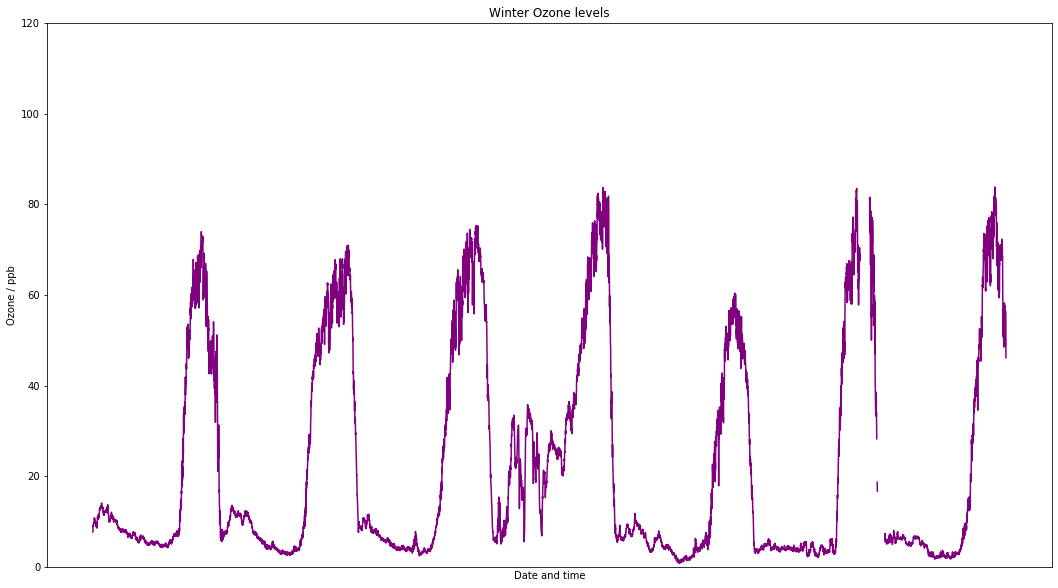

In [37]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(winter_data.index[0:10000],
        df_ozone2[0:10000], '-',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Winter Ozone levels")

# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

axes = plt.gca()
axes.set_ylim([0,120])

plt.show()

### An interesting way to look at this is through plotting data with logarithmic scale for the y-axis

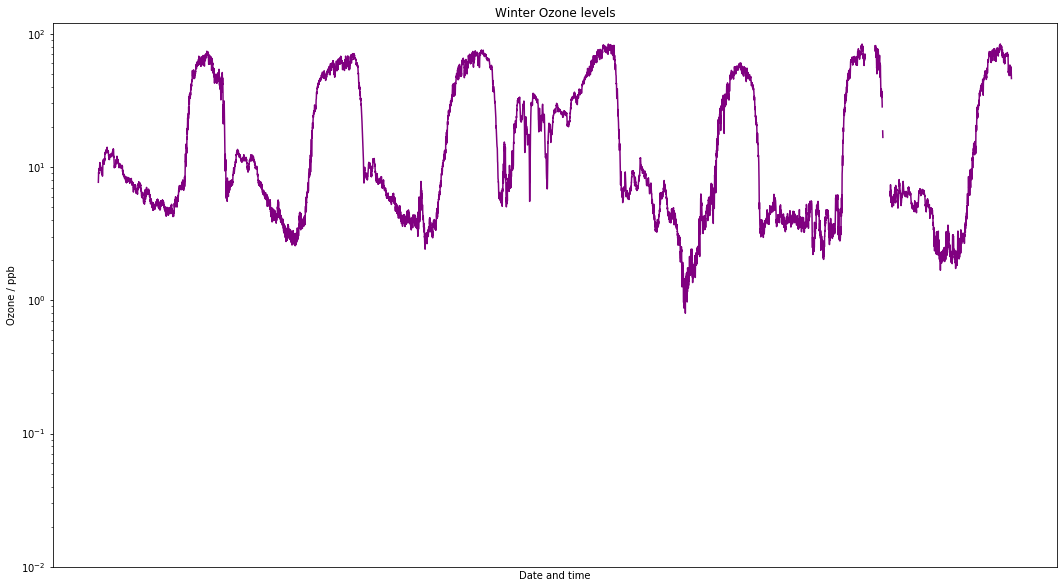

In [36]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.semilogy(winter_data.index[0:10000],
        df_ozone2[0:10000], '-',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Winter Ozone levels")

# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

axes = plt.gca()
axes.set_ylim([0.01,120])

plt.show()

## Autumn ozone

In [39]:
autumn_ozone = pd.read_csv(r'BHAM_IIT_autumn_ozone_final_edited.csv', infer_datetime_format = True, index_col = ['date'])

In [41]:
print(autumn_ozone)

                      O3
date                    
13/10/2018 14:30  55.698
13/10/2018 14:31  55.866
13/10/2018 14:32  55.468
13/10/2018 14:33  59.035
13/10/2018 14:34  60.150
...                  ...
10/11/2018 10:13   9.525
10/11/2018 10:14   9.347
10/11/2018 10:15  10.378
10/11/2018 10:16   9.705
10/11/2018 10:17   9.709

[40068 rows x 1 columns]


In [42]:
autumn_ozone

,O3
date,
13/10/2018 14:30,55.698
13/10/2018 14:31,55.866
13/10/2018 14:32,55.468
13/10/2018 14:33,59.035
13/10/2018 14:34,60.150
...,...
10/11/2018 10:13,9.525
10/11/2018 10:14,9.347
10/11/2018 10:15,10.378


In [49]:
df_ozone3 = pd.DataFrame(autumn_ozone, columns = ['O3'])

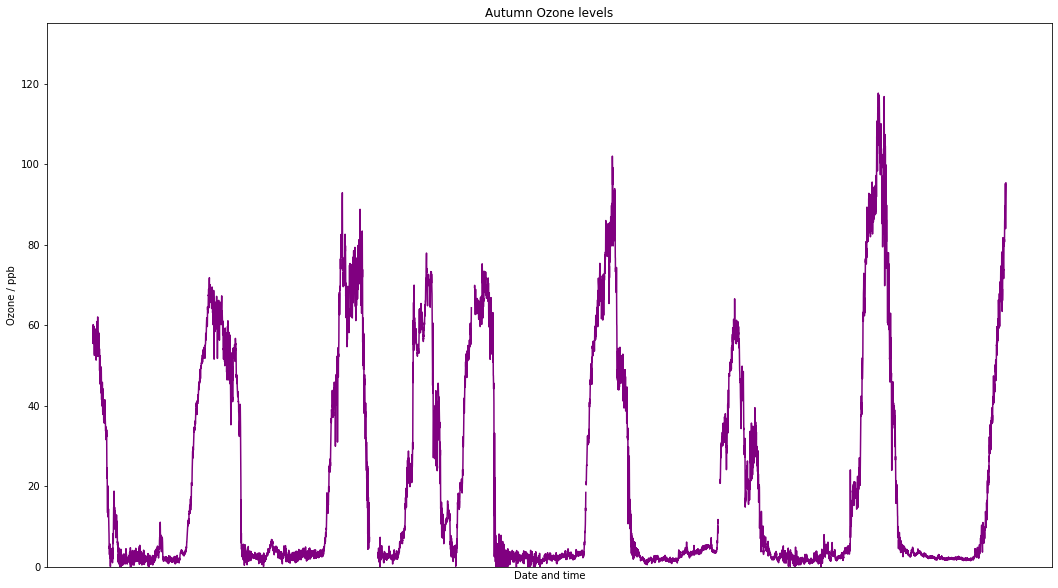

In [57]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(autumn_ozone.index[0:10000],
        df_ozone3[0:10000], '-',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Autumn Ozone levels")

# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

axes = plt.gca()
axes.set_ylim([0,135])

plt.show()

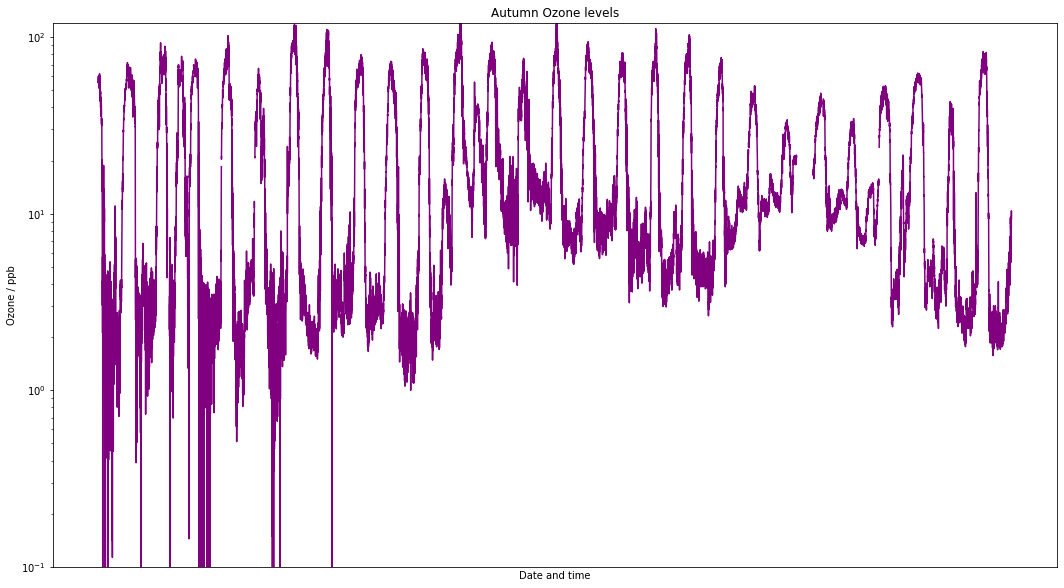

In [54]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.semilogy(autumn_ozone.index,
        df_ozone3, '-',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date and time",
       ylabel="Ozone / ppb",
       title="Autumn Ozone levels")

# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

axes = plt.gca()
axes.set_ylim([0.1,120])

plt.show()

In [53]:
df_ozone


,O3 (ppb)
0,104.904
1,102.303
2,103.608
3,106.620
4,103.694
...,...
57572,50.476
57573,50.137
57574,52.498
57575,53.510


In [24]:
df_date = pd.DataFrame(summer_data, columns = ['date (IST)'])
df_ozone = pd.DataFrame(summer_data, columns = ['O3 (ppb)'])
print(df_date)

             date (IST)
0      26/04/2018 16:24
1      26/04/2018 16:25
2      26/04/2018 16:26
3      26/04/2018 16:27
4      26/04/2018 16:28
...                 ...
57572  05/06/2018 15:56
57573  05/06/2018 15:57
57574  05/06/2018 15:58
57575  05/06/2018 15:59
57576  05/06/2018 16:00

[57577 rows x 1 columns]


In [25]:
print(df_ozone)

       O3 (ppb)
0       104.904
1       102.303
2       103.608
3       106.620
4       103.694
...         ...
57572    50.476
57573    50.137
57574    52.498
57575    53.510
57576    53.035

[57577 rows x 1 columns]


In [39]:
import datetime
dates = []
for df_date in summer_data:
    date = datetime.datetime.strptime['df_date', '%d/%m/%Y']
    dates.append(date)

TypeError: 'builtin_function_or_method' object is not subscriptable